Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
from plotting import raincloud
from scipy.stats import norm, sem, t

sns.set_context('notebook')

In this notebook, we report psychometric results that were obtained using the Psi staircase and the Bayesian model. The psychometric paramters estimated using Psi are stored in the `behavior.txt` data frame. The psychometrics parameters estimated using the Bayesian model are stored in two data frame (`Del1_psychophysics` and `Del2_psychophysics`) that were generated using the `bayesianPsychophysics.py` script. This script require [PyMC3](https://docs.pymc.io/) and it can take a couple of hours to fit all the data from session 1 and 2. Here, we simply load the preprocessed data.

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
outputpath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data')

**Plotting functions.**
The raincloud plots for repeated measures are created using the `plotting.py` script.

In [3]:
def plot_parameters(df, title):
    fig, axs = plt.subplots(2, 1, figsize=(4, 8), sharey='row')

    for i, metric in enumerate(['Threshold', 'Slope']):
        raincloud(data=df, x='Modality', y=metric, ax=axs[i], palette=['#4c72b0', '#c44e52'], levels=['Extero', 'Intero'])
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        labels[0] = 'Exteroception'
        labels[1] = 'Interoception'
        axs[i].set_xticklabels(labels, size=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', axis='y',linestyle='--')
        axs[i].tick_params(axis='x', which='minor', bottom=False)

    axs[1].set_ylabel('Slope', size=15)
    axs[0].set_ylabel('Threshold', size=15)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=300)

In [4]:
def plot_psychometricFunctions(df, title):

    fig, axs = plt.subplots(2, 1, figsize=(6, 8))
    for i, modality, col in zip((0, 1), ['Intero', 'Extero'], ['#c44e52', '#4c72b0']):
        threshold, slope = [], []
        for subject in df.Subject.unique():
            threshold.append(df.Threshold[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)
            slope.append(df.Slope[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i].set_ylabel('P$_{(Response=Faster)}$', size=12)
            axs[i].set_xlabel('Intensity ($\Delta$ BPM)', size=12)
        axs[i].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color='w', markersize=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', linestyle='--')
        axs[i].tick_params(axis='y', which='minor', left=False)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=600)

# Psychometric parameters - Psi estimates

In this section, we report psychometrics parameters estimated using the Psi staircase across both sessions and modalities.

## Session 1

In [5]:
behavior_df = pd.read_csv(os.path.join(outputpath, 'behavior.txt'))

In [6]:
print(f'n Session 1 = {behavior_df[(behavior_df.Session=="Del1") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

n Session 1 = 206


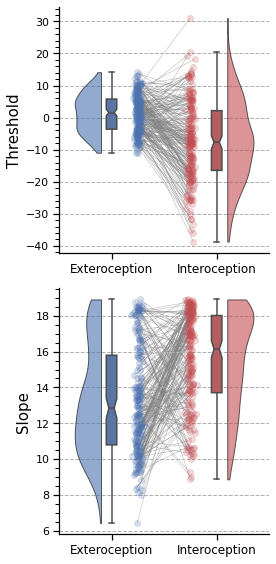

In [7]:
plot_parameters(
    df=behavior_df[(behavior_df.Session=='Del1') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_parameters_del1')

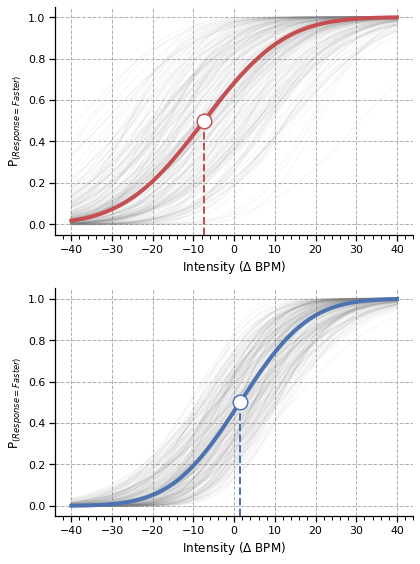

In [8]:
plot_psychometricFunctions(
    df=behavior_df[(behavior_df.Session=='Del1') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_functions_del1')

In [9]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Threshold', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,9.898257,205.0,two-sided,3.952701e-19,1.206e+16,0.903579


In [10]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Slope', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-7.864385,205.0,two-sided,2.084145e-13,3.069e+10,-0.805265


## Session 2

In [11]:
print(f'n Session 2 = {behavior_df[(behavior_df.Session=="Del2") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

n Session 2 = 191


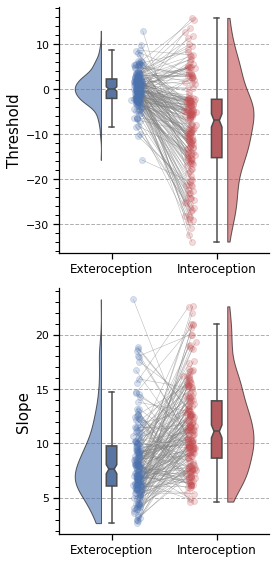

In [12]:
plot_parameters(
    df=behavior_df[(behavior_df.Session=='Del2') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_parameters_del2')

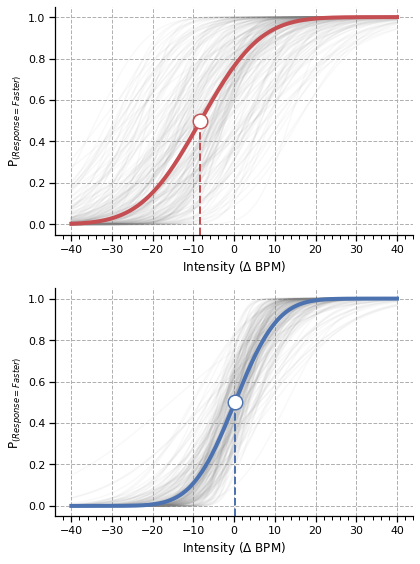

In [13]:
plot_psychometricFunctions(
    df=behavior_df[(behavior_df.Session=='Del2') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='SupplementaryMaterial1_functions_del2')

In [14]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Threshold', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,11.661283,190.0,two-sided,4.747802e-24,8.31e+20,1.065909


In [15]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Slope', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-8.926768,190.0,two-sided,3.726936e-16,1.501e+13,-0.868123


# Psychometric parameters - post hoc Bayesian estimates

In this section, we report psychometrics parameters estimated using the Bayesian model applied to preprocessed data across both sessions and modalities.

## Session 1

In [16]:
del1 = pd.read_csv(os.path.join(outputpath, 'Del1_psychophysics.txt'))
print(f'n Session 1 = {del1.Subject.nunique()}')

n Session 1 = 206


In [17]:
def plot_parameters(df, title):
    fig, axs = plt.subplots(2, 1, figsize=(4, 8), sharey='row')

    for i, metric in enumerate(['BayesianThreshold', 'BayesianSlope']):
        raincloud(data=df, x='Modality', y=metric, ax=axs[i], levels=['Extero', 'Intero'], palette=['#4c72b0', '#c44e52'])
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        labels[1] = 'Interoception'
        labels[0] = 'Exteroception'
        axs[i].set_xticklabels(labels, size=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', axis='y',linestyle='--')
        axs[i].tick_params(axis='x', which='minor', bottom=False)

    axs[1].set_ylabel('Slope', size=15)
    axs[0].set_ylabel('Threshold', size=15)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=300)

In [18]:
def plot_psychometricFunctions(df, title):

    fig, axs = plt.subplots(2, 1, figsize=(6, 8))
    for i, modality, col in zip((0, 1), ['Intero', 'Extero'], ['#c44e52', '#4c72b0']):
        threshold, slope = [], []
        for subject in df.Subject.unique():
            threshold.append(df.BayesianThreshold[(df.Modality == modality) & (df.Subject == subject)].values)
            slope.append(df.BayesianSlope[(df.Modality == modality) & (df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i].set_ylabel('P$_{(Response=Faster)}$', size=12)
            axs[i].set_xlabel('Intensity ($\Delta$ BPM)', size=12)
        axs[i].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color='w', markersize=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', linestyle='--')
        axs[i].tick_params(axis='y', which='minor', left=False)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


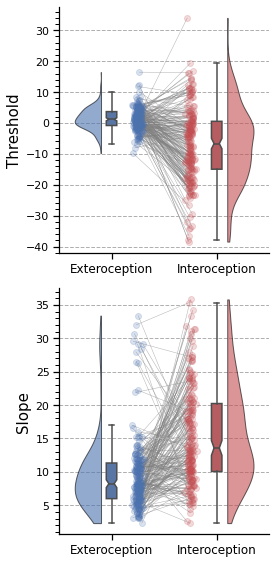

In [19]:
plot_parameters(
    df=del1,
    title='Fig2Parameters')

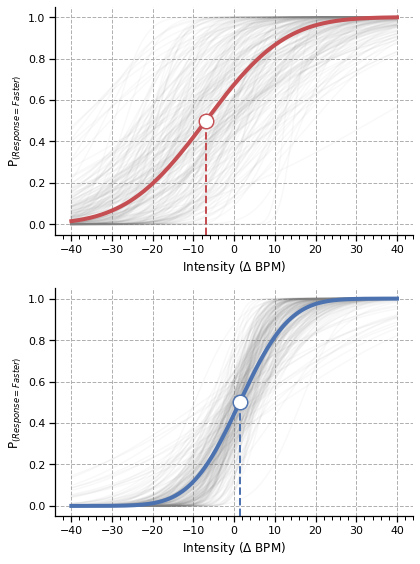

In [20]:
plot_psychometricFunctions(
    df=del1,
    title='Fig2Functions')

### Threshold

In [21]:
pg.compute_bootci(x=del1[del1.Modality=='Intero'].BayesianThreshold.to_numpy(), func='mean')

array([-8.59, -5.34])

In [22]:
pg.compute_bootci(x=del1[del1.Modality=='Extero'].BayesianThreshold.to_numpy(), func='mean')

array([0.89, 1.89])

In [23]:
pg.pairwise_ttests(data=del1, subject='Subject', dv='BayesianThreshold', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,1.363267,3.590899,-6.974806,12.087805,True,True,9.891671,205.0,two-sided,4.132753e-19,1.155e+16,0.935124


### Slope

In [24]:
pg.compute_bootci(x=del1[del1.Modality=='Intero'].BayesianSlope.to_numpy(), func='mean')

array([14.36, 16.33])

In [25]:
pg.compute_bootci(x=del1[del1.Modality=='Extero'].BayesianSlope.to_numpy(), func='mean')

array([ 8.89, 10.43])

In [26]:
pg.pairwise_ttests(data=del1, subject='Subject', dv='BayesianSlope', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,9.585364,5.609934,15.348568,7.263269,True,True,-9.056454,205.0,two-sided,1.074750e-16,4.977e+13,-0.888085


## Session 2

In [27]:
del2 = pd.read_csv(os.path.join(outputpath, 'Del2_psychophysics.txt'))
print(f'n Session 2 = {del2.Subject.nunique()}')

n Session 2 = 191


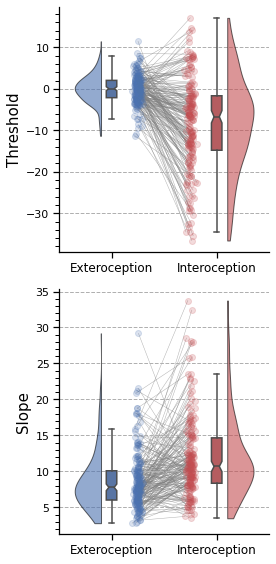

In [28]:
plot_parameters(
    df=del2,
    title='SupplementaryMaterial5_Del2PsiParameters')

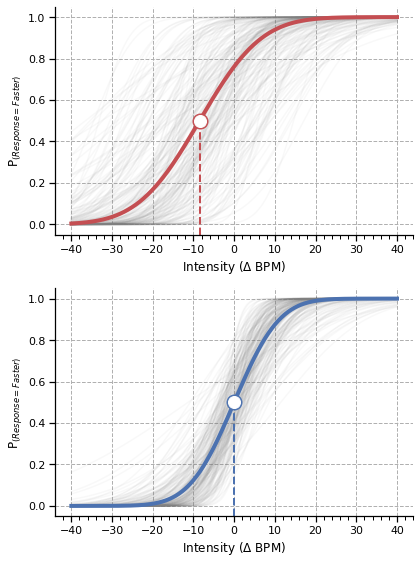

In [29]:
plot_psychometricFunctions(
    df=del2,
    title='SupplementaryMaterial5_Del2PsiFunctions')

### Threshold

In [30]:
pg.compute_bootci(x=del2[del2.Modality=='Intero'].BayesianThreshold.to_numpy(), func='mean')

array([-10.06,  -6.87])

In [31]:
pg.compute_bootci(x=del2[del2.Modality=='Extero'].BayesianThreshold.to_numpy(), func='mean')

array([-0.47,  0.54])

In [32]:
pg.compute_bootci(x=del2[del2.Modality=='Extero'].BayesianThreshold.to_numpy(), func='mean')

array([-0.48,  0.47])

In [33]:
pg.pairwise_ttests(data=del2, subject='Subject', dv='BayesianThreshold', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,0.008995,3.490174,-8.508325,11.129,True,True,11.158633,190.0,two-sided,1.463749e-22,2.857e+19,1.03274


### Slope

In [34]:
pg.compute_bootci(x=del2[del2.Modality=='Intero'].BayesianSlope.to_numpy(), func='mean')

array([11.19, 12.8 ])

In [35]:
pg.compute_bootci(x=del2[del2.Modality=='Extero'].BayesianSlope.to_numpy(), func='mean')

array([8.13, 9.26])

In [36]:
pg.compute_bootci(x=del2[del2.Modality=='Extero'].BayesianSlope.to_numpy(), func='mean')

array([8.17, 9.31])

In [37]:
pg.pairwise_ttests(data=del2, subject='Subject', dv='BayesianSlope', within='Modality', effsize='cohen', return_desc=True)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,8.690387,4.035314,11.967581,5.58317,True,True,-7.29421,190.0,two-sided,7.913760e-12,9.121e+08,-0.672781


# Session * Condition ANOVA

In [38]:
del1['Session'] = 'Del1'
del2['Session'] = 'Del2'
session_df = del1.append(del2)

In [39]:
for sub in session_df.Subject.unique():
    if session_df[session_df.Subject == sub].BayesianThreshold.isnull().any():
        session_df = session_df[session_df.Subject!=sub]
    if len(session_df[session_df.Subject == sub].BayesianThreshold)<4:
        session_df = session_df[session_df.Subject!=sub]

In [40]:
session_df.Subject.nunique()

179

In [41]:
pg.rm_anova(data=session_df, subject='Subject', dv='BayesianThreshold', within=['Session', 'Modality'])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Session,542.977936,1,178,542.977936,13.208399,3.645270e-04,3.645270e-04,0.069079,1.0
1,Modality,12371.814006,1,178,12371.814006,127.539341,1.199310e-22,1.199310e-22,0.417424,1.0
2,Session * Modality,18.362255,1,178,18.362255,0.605135,4.376584e-01,4.376584e-01,0.003388,1.0


In [42]:
pg.rm_anova(data=session_df, subject='Subject', dv='BayesianSlope', within=['Session', 'Modality'])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Session,885.043053,1,178,885.043053,31.275291,8.309311e-08,8.309311e-08,0.149446,1.0
1,Modality,3520.361093,1,178,3520.361093,106.299152,7.711638e-20,7.711638e-20,0.373899,1.0
2,Session * Modality,260.531008,1,178,260.531008,9.466727,2.423046e-03,2.423046e-03,0.050498,1.0


In [43]:
pg.pairwise_ttests(data=session_df, subject='Subject', dv='BayesianSlope', within=['Modality', 'Session'], effsize='cohen', return_desc=True)

,Contrast,Modality,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,-,Extero,Intero,9.214000,3.956602,13.648729,4.744129,True,True,-10.310148,178.0,two-sided,7.711638e-20,6.152e+16,-1.015242
1,Session,-,Del1,Del2,12.543162,4.758704,10.319567,3.620317,True,True,5.592432,178.0,two-sided,8.309311e-08,1.223e+05,0.525921
2,Modality * Session,Extero,Del1,Del2,9.722581,5.814725,8.705419,4.078591,True,True,2.199734,178.0,two-sided,2.911390e-02,0.875,0.202531
3,Modality * Session,Intero,Del1,Del2,15.363743,7.292985,11.933715,5.339340,True,True,5.357704,178.0,two-sided,2.582845e-07,4.131e+04,0.536675


# Correlation between Psi and Bayesian estimates

This section compare the psychometric parameters estimates across modalities and sesssions. These results are provided in Supplementary Materials.

In [44]:
sns.set_context('talk')

## Session 1

### Threshold

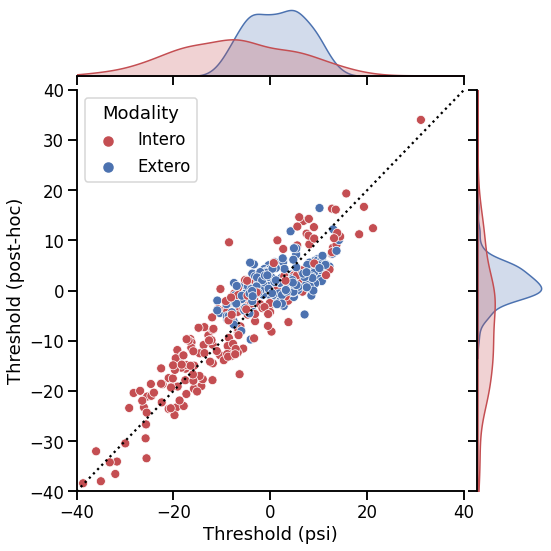

In [45]:
g = sns.jointplot(data=del1,
                  x='Threshold', y='BayesianThreshold', hue='Modality', xlim=(-40, 40),
                  ylim=(-40, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Threshold1.svg', dpi=300)

In [46]:
pg.corr(x=del1[del1.Modality=='Extero'].Threshold,
        y=del1[del1.Modality=='Extero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,206,0.639768,"[0.55, 0.71]",0.409303,0.403483,4.138262e-25,1.088e+22,1.0


In [47]:
pg.corr(x=del1[del1.Modality=='Intero'].Threshold,
        y=del1[del1.Modality=='Intero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,206,0.927867,"[0.91, 0.94]",0.860938,0.859567,2.433141e-89,3.052e+85,1.0


## Slope

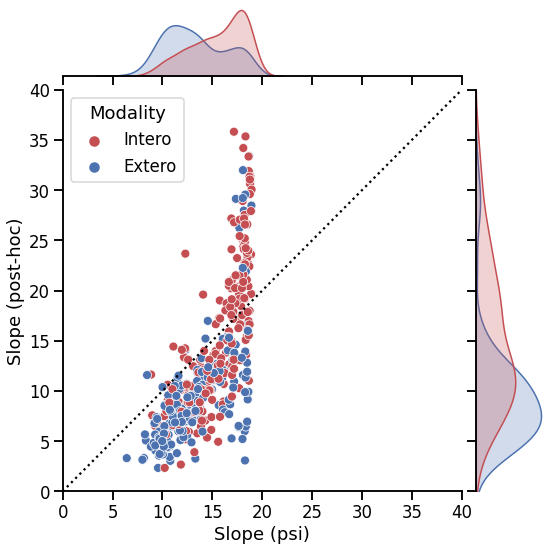

In [48]:
g = sns.jointplot(data=del1,
                  x='Slope', y='BayesianSlope', hue='Modality', xlim=(0, 40),
                  ylim=(0, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Slope1.svg', dpi=300)

In [49]:
pg.corr(x=del1[del1.Modality=='Extero'].Slope,
        y=del1[del1.Modality=='Extero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,206,0.698407,"[0.62, 0.76]",0.487773,0.482726,1.842847e-31,1.0


In [50]:
pg.corr(x=del1[del1.Modality=='Intero'].Slope,
        y=del1[del1.Modality=='Intero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,206,0.800348,"[0.75, 0.84]",0.640556,0.637015,3.284693e-47,1.0


## Session 2

### Threshold

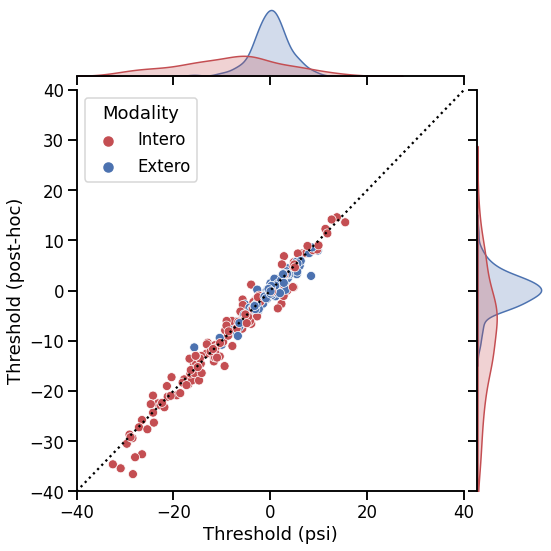

In [51]:
g = sns.jointplot(data=del2,
                  x='Threshold', y='BayesianThreshold', hue='Modality', xlim=(-40, 40),
                  ylim=(-40, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Threshold2.svg', dpi=300)

In [52]:
pg.corr(x=del2[del2.Modality=='Extero'].Threshold,
        y=del2[del2.Modality=='Extero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,154,0.96572,"[0.95, 0.97]",0.932615,0.931722,6.255026e-91,7.467e+86,1.0


In [53]:
pg.corr(x=del2[del2.Modality=='Intero'].Threshold,
        y=del2[del2.Modality=='Intero'].BayesianThreshold, method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,147,0.983033,"[0.98, 0.99]",0.966355,0.965887,1.071345e-108,2.247e+104,1.0


## Slope

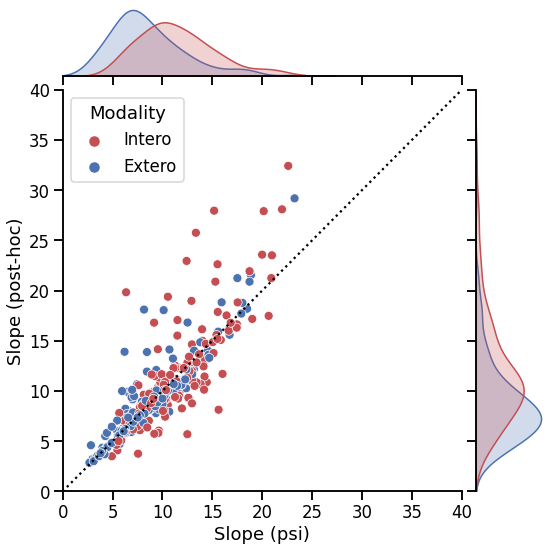

In [54]:
g = sns.jointplot(data=del2,
                  x='Slope', y='BayesianSlope', hue='Modality', xlim=(0, 40),
                  ylim=(0, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/SupplementaryMaterial2_Slope2.svg', dpi=300)

In [55]:
pg.corr(x=del2[del2.Modality=='Extero'].Slope,
        y=del2[del2.Modality=='Extero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,154,0.905386,"[0.87, 0.93]",0.819724,0.817336,2.014196e-58,1.0


In [56]:
pg.corr(x=del2[del2.Modality=='Intero'].Slope,
        y=del2[del2.Modality=='Intero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,147,0.784861,"[0.71, 0.84]",0.616007,0.610674,6.128016e-32,1.0
